In [1]:
CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta
from doctest import testmod
from scipy.signal import savgol_filter

In [3]:
confirmed = pd.read_csv(CONFIRMED)
deaths = pd.read_csv(DEATHS)
recovered = pd.read_csv(RECOVERED)

In [4]:
confirmed = confirmed.set_index('Country/Region')
deaths = deaths.set_index('Country/Region')
recovered = recovered.set_index('Country/Region')

In [5]:
def prepare_data(dataset):
    data = dataset.iloc[:,3:].groupby(['Country/Region']).sum().transpose()
    data.index = pd.to_datetime(data.index)
    data = data.sort_index(ascending=True)
    data = pd.DataFrame(data)
    data = data.fillna(method='ffill')
    data = data.fillna(0)
    return data

In [6]:
def difference(dataset, interval=1):
    return dataset.apply(lambda x: x - x.shift(1)).fillna(0)

In [7]:
def weekly_moving_average(dataset, days=7):  
    return dataset.apply(lambda x: (x + x.shift(1) + x.shift(2) + x.shift(3)
                                    + x.shift(4) + x.shift(5)+ x.shift(6))/7)

In [8]:
# Adding population data
POPULATION_DATASET = '/Users/filippawlak/API_SP.POP.TOTL_DS2_en_excel_v2_2015410.xls'
population_dataset = pd.read_excel(POPULATION_DATASET, skiprows=3)
population = pd.DataFrame(population_dataset[['Country Name','2019']]).set_index('Country Name')
population.head()

,2019
Country Name,
Aruba,106314.0
Afghanistan,38041754.0
Angola,31825295.0
Albania,2854191.0
Andorra,77142.0


In [9]:
country_dict = {
    "Czechia" : "Czech Republic",
    "Slovakia" : "Slovak Republic",
}
def cases_per_100k(df):
    df_new = pd.DataFrame()
    for country in df:
        if country in country_dict:
            country2 = country_dict[country]
            country_population = population.loc[country2][0]
        else:
            country_population = population.loc[country][0]
        df_new[country] = df[country].apply(lambda x: x/country_population * 100000)
    return df_new
        
    

In [22]:
def weekly_difference(dataset, days=7):  
    return dataset.apply(lambda x: (x - x.shift(7))/x.shift(7)*100).replace([np.inf, -np.inf], np.nan).fillna(method='ffill')

In [11]:
data = difference(prepare_data(confirmed))['Spain']
data

2020-01-22        0.0
2020-01-23        0.0
2020-01-24        0.0
2020-01-25        0.0
2020-01-26        0.0
               ...   
2021-03-05     6654.0
2021-03-06        0.0
2021-03-07        0.0
2021-03-08    11958.0
2021-03-09     4012.0
Name: Spain, Length: 413, dtype: float64

In [12]:
countries = ['Germany', 'Poland', 'Spain','Italy', 'Czechia', 'Portugal', 'Slovakia']
data = difference(prepare_data(confirmed))[countries].tail(20)
data

Country/Region,Germany,Poland,Spain,Italy,Czechia,Portugal,Slovakia
2021-02-18,9845.0,9074.0,14515.0,13755.0,10930.0,1944.0,2555.0
2021-02-19,9050.0,8772.0,11435.0,15470.0,11705.0,1940.0,2333.0
2021-02-20,7162.0,8509.0,0.0,14914.0,11364.0,1570.0,2705.0
2021-02-21,6094.0,7040.0,0.0,13450.0,6838.0,1186.0,1686.0
2021-02-22,4984.0,3891.0,20849.0,9617.0,4021.0,549.0,649.0
2021-02-23,5764.0,6304.0,7461.0,13299.0,11311.0,1032.0,1998.0
2021-02-24,10774.0,12147.0,9212.0,16402.0,15861.0,1480.0,3547.0
2021-02-25,11032.0,12143.0,9568.0,19871.0,13816.0,1160.0,2438.0
2021-02-26,9437.0,11536.0,8341.0,20488.0,14612.0,1027.0,2645.0
2021-02-27,7671.0,12097.0,0.0,18902.0,14815.0,1071.0,2848.0


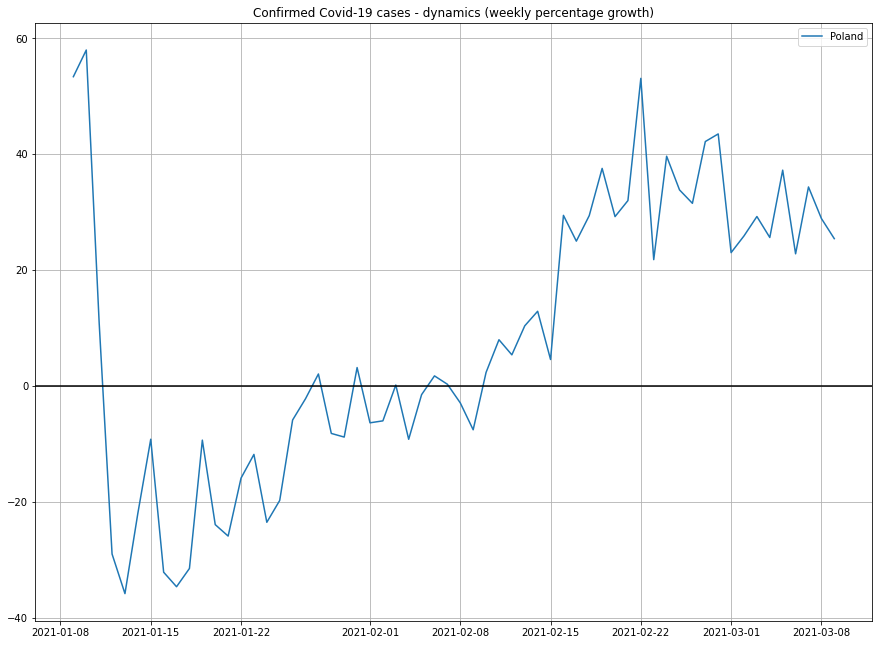

In [13]:
# Confirmed cases weekly growth 

countries = ['Poland']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(60)
plt.figure(figsize=(15,11))
plt.title('Confirmed Covid-19 cases - dynamics (weekly percentage growth)')
plt.plot(data)
plt.axhline(0, color="black", linestyle="-")
plt.grid(True)
plt.legend(data.columns)
plt.show()


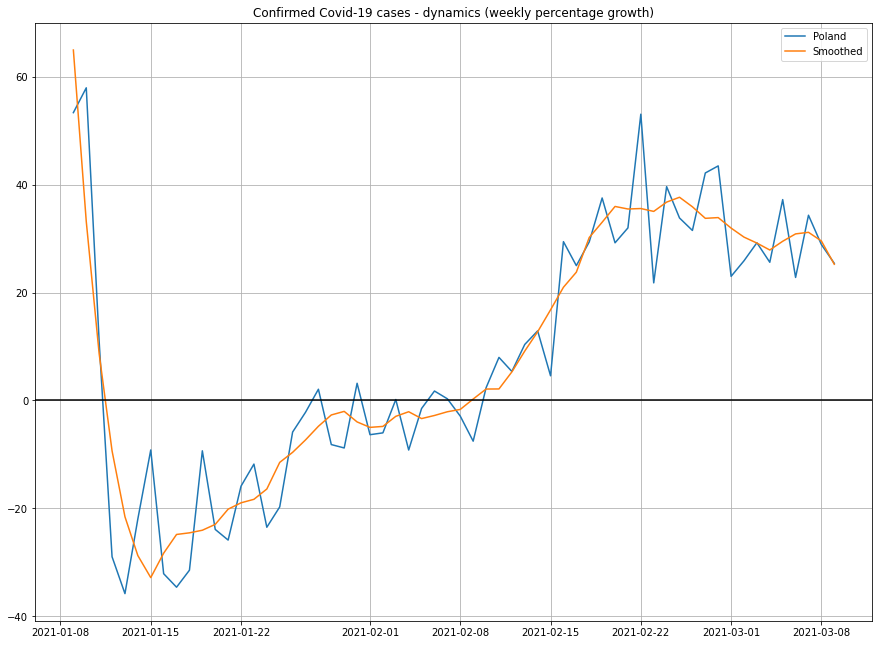

In [14]:
countries = ['Poland']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(60)
smoothed_data = savgol_filter(data['Poland'], 11, 3) # window size, polynomial order 3

plt.figure(figsize=(15,11))
plt.title('Confirmed Covid-19 cases - dynamics (weekly percentage growth)')
plt.plot(data.index, data['Poland'], label='Poland')
plt.plot(data.index, smoothed_data, label='Smoothed')
plt.axhline(0, color="black", linestyle="-")
plt.grid(True)
plt.legend()
plt.show()

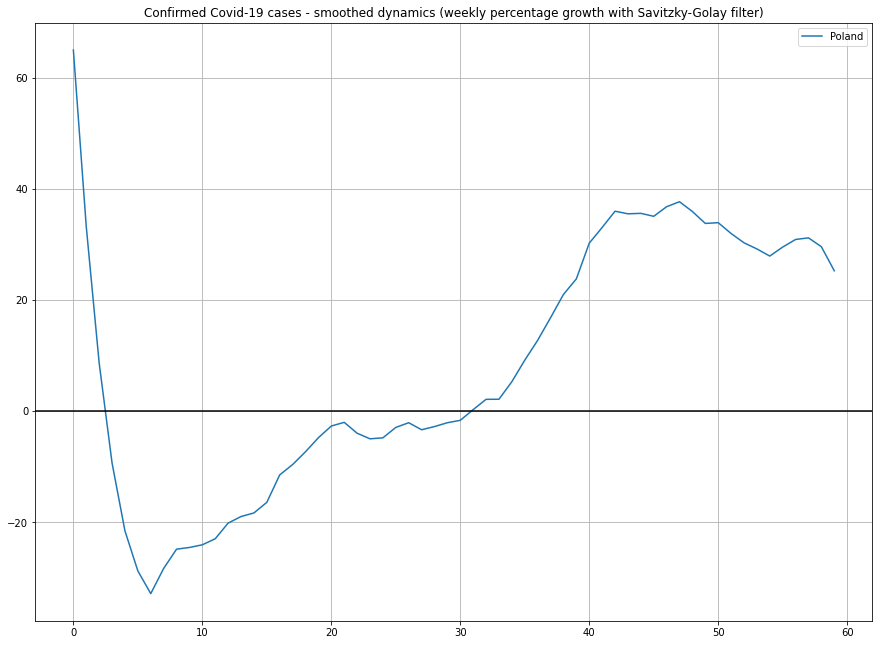

In [15]:

countries = ['Poland']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(60)

smoothed_data = savgol_filter(data['Poland'], 11, 3) # window size 11, polynomial order 3

plt.figure(figsize=(15,11))
plt.title('Confirmed Covid-19 cases - smoothed dynamics (weekly percentage growth with Savitzky-Golay filter)')
plt.plot(smoothed_data)
plt.axhline(0, color="black", linestyle="-")
plt.grid(True)
plt.legend(data.columns)
plt.show()


In [16]:
from scipy.signal import savgol_filter
def smoothed_data(dataset, window_size=11, polynomial_order=3):
    df_new = pd.DataFrame(index=dataset.index)
    for country in dataset.columns:
        df_new[country] = savgol_filter(dataset[country], window_size, polynomial_order)
    return df_new

In [23]:
countries = ['Poland', 'Italy', 'Czechia', 'Portugal', 'Slovakia']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(60)
data

Country/Region,Poland,Italy,Czechia,Portugal,Slovakia,Spain
2021-01-09,53.354268,68.930233,280.475776,192.440605,134.562212,134.720452
2021-01-10,57.955725,30.747631,68.575419,121.690307,143.888433,134.720452
2021-01-11,10.900798,16.040007,-31.188834,28.267338,35.220126,100.863338
2021-01-12,-28.988942,-7.369106,-27.675876,46.468927,-19.371027,7.333333
2021-01-13,-35.822785,-22.399882,-37.681745,5.275755,-27.888687,7.333333
2021-01-14,-21.965509,-6.369461,-38.547235,7.766697,36.780533,-15.302172
2021-01-15,-9.186352,-7.901192,-45.609313,4.785770,-8.422819,57.907762
2021-01-16,-32.129561,-18.352022,-29.081205,15.499050,-49.778978,57.907762
2021-01-17,-34.632651,-32.649664,-37.826962,38.429752,-80.726539,57.907762
2021-01-18,-31.482624,-29.569034,-37.211471,19.593148,23.255814,37.226075


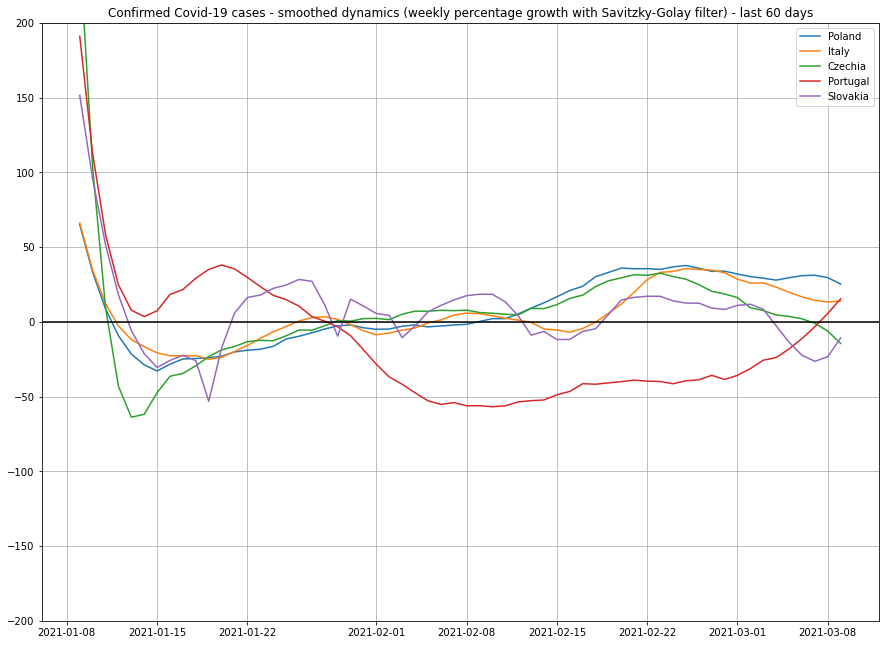

In [26]:
countries = ['Poland', 'Italy', 'Czechia', 'Portugal', 'Slovakia']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(60)
smooth_confirmed = smoothed_data(data)
plt.figure(figsize=(15,11))
plt.title('Confirmed Covid-19 cases - smoothed dynamics (weekly percentage growth with Savitzky-Golay filter) - last 60 days')
plt.plot(smooth_confirmed)
plt.axhline(0, color="black", linestyle="-")
plt.ylim(-200, 200)
plt.grid(True)
plt.legend(smooth_confirmed.columns)
plt.show()

In [ ]:
countries = ['Poland']
# countries = ['Poland', 'Italy', 'Czechia', 'Portugal', 'Slovakia']
data = weekly_difference(difference(prepare_data(confirmed)))[countries].tail(360)
smooth_confirmed = smoothed_data(data)
plt.figure(figsize=(25,11))
plt.title('Confirmed Covid-19 cases - smoothed dynamics (weekly percentage growth with Savitzky-Golay filter) - last 180 days')
plt.plot(smooth_confirmed)
plt.axhline(0, color="black", linestyle="-")
plt.ylim(-200, 200)
plt.grid(True)
plt.legend(smooth_confirmed.columns)
plt.show()

In [ ]:
VACCINATION = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'

In [ ]:
vaccination = pd.read_csv(VACCINATION)
vaccination

In [ ]:
vaccination[vaccination['location']=='World']

In [ ]:
vaccination.groupby(['location', 'date']).sum()

In [ ]:
people_vaccinated = vaccination.pivot(index='date', columns='location', values = 'people_vaccinated')
people_vaccinated

In [ ]:
people_vaccinated['Poland']

In [ ]:
vaccination.groupby(['location']).sum()